# Singular Value Decomposition

Let $A$ be a $m \times n$ matrix with rank $r$. If $m \ne n$, then $A$ can not have eigenvalues and eigenvectors. However, we can still obtain the eigenvalues and eigenvectors of $A^TA$.

Let $v_1, \ldots, v_r$ be the orthonormal eigenvectors of $A^TA$. Then,
$$
A^T A v_i = \sigma_i^2 v_i
\tag{1}
$$

where, $\sigma_i^2$ is the eigenvalue corresponding to the $i^{th}$ eigenvector.

Let,
$$
u_i = \frac{Av_i}{\sigma_i}
\tag{2}
$$
Then,
$$
\begin{align}
A^Tu_i &= A^T \frac{Av_i}{\sigma_i} \\
AA^Tu_i &= AA^T \frac{Av_i}{\sigma_i} \\
&= \frac{A}{\sigma_i}A^TAv_i \\
&= \frac{A}{\sigma_i}{\sigma_i^2 v_i} \\
&= \frac{\sigma_i^2}{\sigma_i}A v_i \\
&= \sigma_i^2 u_i \tag{3}
\end{align}
$$
Thus, $u_1, \ldots, u_r$ are the eigenvectors of $AA^T$.

From $(2)$,
$$
\begin{align}
Av_i = u_i \sigma_i
A = u_i \sigma_i v_i^*
\tag{4}
\end{align}
$$
where, $v_i^*$ is the complex conjugate of $v_i$.

Equation $(4)$ can be written in matrix form as,
$$
A = U \Sigma V^*
\tag{5}
$$
where, 
- $U$ is a $m \times r$ matrix of the eigenvectors of $AA^T$,
- $\Sigma$ is a diagonal matrix containing the $r$ singular values which are the square roots of the non-zero eigenvalues of both $AA^T$ and $A^TA$.
- $V$ is a $n \times r$ matrix of the eigenvectors of $A^TA$.

Equation $(5)$ shows how the matrix $A$ can be decomposed into the three simpler matrices: $U$, $\Sigma$, and $V$.

## Example: Image Compression

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import io

from PIL import Image

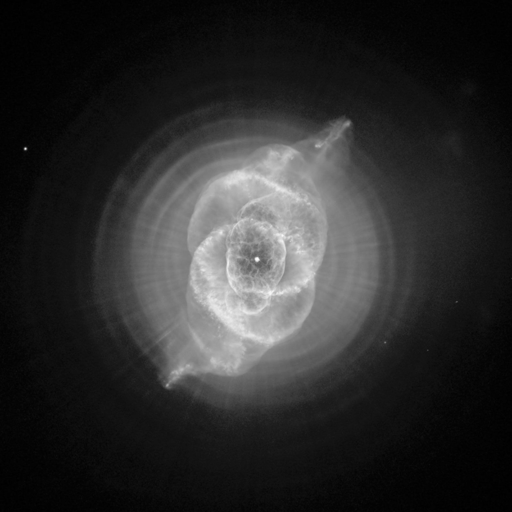

In [42]:
img = Image.open(io.BytesIO(requests.get("https://cdn.britannica.com/70/94870-050-2ECAB6AD/Cats-Eye-nebula.jpg").content)).resize((512, 512)).convert("L")
img

In [57]:
img_np = np.array(img)
U, D, VT = np.linalg.svd(img_np)

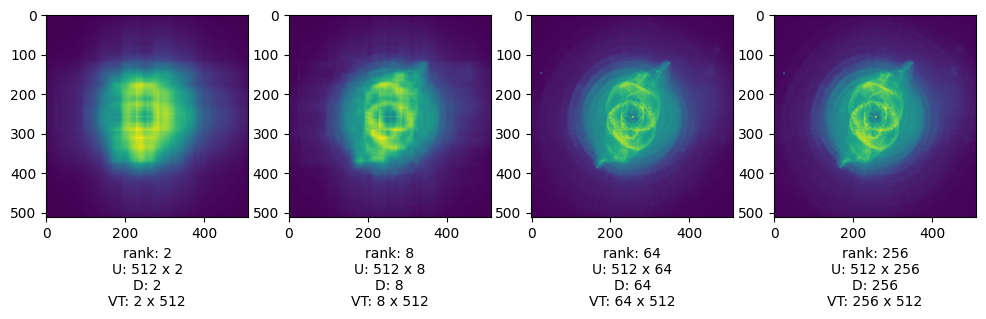

In [58]:
ranks = [2, 8, 64, 256]

fig, axs = plt.subplots(1, len(ranks), figsize=(12, 6))
for i, rank in enumerate(ranks):
    re_img = (U[:, :rank] * D[:rank]) @ VT[:rank, :]
    axs[i].imshow(re_img)
    axs[i].set_xlabel(
        f"rank: {rank}\n"
        f"U: {U.shape[0]} x {rank}\n"
        f"D: {rank}\n"
        f"VT: {rank} x {VT.shape[1]}"
    )